# Library Import

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when
import matplotlib.pyplot as plt
import seaborn as sns

# Create a SparkSession
#spark = SparkSession.builder.appName("FlightDelayAnalysis").getOrCreate()
spark = SparkSession.builder.config("spark.driver.memory", "40g") \
                            .config("spark.executor.memory", "40g") \
                            .appName("FlightDelayAnalysis") \
                            .getOrCreate()


# Data Import and View

In [ ]:
# load the Parquet file as a DataFrame
flights_df = spark.read.parquet("updated_data.parquet")
flights_df.printSchema()

root
 |-- year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- DayofMonth: integer (nullable = true)
 |-- DayOfWeek: integer (nullable = true)
 |-- DepTime: integer (nullable = true)
 |-- CRSDepTime: integer (nullable = true)
 |-- ArrTime: integer (nullable = true)
 |-- CRSArrTime: integer (nullable = true)
 |-- UniqueCarrier: string (nullable = true)
 |-- FlightNum: integer (nullable = true)
 |-- TailNum: string (nullable = true)
 |-- ActualElapsedTime: integer (nullable = true)
 |-- CRSElapsedTime: integer (nullable = true)
 |-- AirTime: integer (nullable = true)
 |-- ArrDelay: integer (nullable = true)
 |-- DepDelay: integer (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Distance: integer (nullable = true)
 |-- TaxiIn: integer (nullable = true)
 |-- TaxiOut: integer (nullable = true)
 |-- Cancelled: integer (nullable = true)
 |-- CancellationCode: string (nullable = true)
 |-- Diverted: integer (nullable = true)

# Visualize the unique values and counts for each column for further analysis

In [ ]:
# Loop through each column in the DataFrame
for col_name in flights_df.columns:
    # Use distinct() method to find unique values in the column
    unique_values = flights_df.select(col_name).distinct().collect()
    unique_values = [row[0] for row in unique_values]
    
    # Get the count of unique values in the column
    unique_count = len(unique_values)
    
    # Print the column name, unique values, and unique count
    print("Column Name: {}".format(col_name))
    print("Unique Values: {}".format(unique_values))
    print("Unique Count: {}".format(unique_count))
    print("\n")


Column Name: year
Unique Values: [2006, 2005, 2007, 2008, 2004]
Unique Count: 5


Column Name: Month
Unique Values: [6, 5, 8, 7, 12, 10, 11, 1, 3, 2, 9, 4]
Unique Count: 12


Column Name: DayofMonth
Unique Values: [31, 28, 26, 27, 12, 22, 1, 13, 6, 16, 3, 20, 5, 19, 15, 9, 17, 4, 8, 23, 7, 10, 25, 24, 29, 21, 11, 14, 2, 30, 18]
Unique Count: 31


Column Name: DayOfWeek
Unique Values: [1, 6, 3, 5, 4, 7, 2]
Unique Count: 7


Column Name: DepTime
Unique Values: [1829, 1645, 1238, 1342, 833, 2142, 1959, 2122, 148, 1127, 540, 1522, 1025, 623, 737, 858, 1721, 2235, 1507, 243, 1650, 1339, 1903, 1139, 1322, 31, 1143, 1618, 1303, 1352, 516, 808, 2231, 2025, 2259, 137, 451, 2525, 251, 1223, 2249, 458, 2027, 2156, 1157, 804, 255, 2247, 53, 853, 1718, 2238, 2035, 133, 918, 1133, 1808, 1005, 1016, 513, 322, 1533, 857, 613, 633, 321, 1417, 1743, 1653, 1212, 2513, 744, 1525, 1331, 108, 950, 1700, 155, 1344, 1537, 642, 2200, 1404, 1924, 34, 530, 2225, 211, 115, 2342, 756, 1745, 1500, 101, 2003, 1823, 

# Get the index for each column for further map reduce functions

In [ ]:
# Define a list of column names in the order of columns in the RDD
column_names = ["year", "Month", "DayofMonth", "DayOfWeek", "DepTime", "CRSDepTime", "ArrTime", "CRSArrTime", "UniqueCarrier", "FlightNum", "TailNum", "ActualElapsedTime", "CRSElapsedTime", "AirTime", "ArrDelay", "DepDelay", "Origin", "Dest", "Distance", "TaxiIn", "TaxiOut", "Cancelled", "CancellationCode", "Diverted", "CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay", "OnTime", "DelayStatus"]

# Loop through the RDD and print column name along with the corresponding value in each row
#for row in flights_rdd.collect():
for i in range(len(column_names)):
    print("Column Name: {}, Index: {}".format(column_names[i], i))

Column Name: year, Index: 0
Column Name: Month, Index: 1
Column Name: DayofMonth, Index: 2
Column Name: DayOfWeek, Index: 3
Column Name: DepTime, Index: 4
Column Name: CRSDepTime, Index: 5
Column Name: ArrTime, Index: 6
Column Name: CRSArrTime, Index: 7
Column Name: UniqueCarrier, Index: 8
Column Name: FlightNum, Index: 9
Column Name: TailNum, Index: 10
Column Name: ActualElapsedTime, Index: 11
Column Name: CRSElapsedTime, Index: 12
Column Name: AirTime, Index: 13
Column Name: ArrDelay, Index: 14
Column Name: DepDelay, Index: 15
Column Name: Origin, Index: 16
Column Name: Dest, Index: 17
Column Name: Distance, Index: 18
Column Name: TaxiIn, Index: 19
Column Name: TaxiOut, Index: 20
Column Name: Cancelled, Index: 21
Column Name: CancellationCode, Index: 22
Column Name: Diverted, Index: 23
Column Name: CarrierDelay, Index: 24
Column Name: WeatherDelay, Index: 25
Column Name: NASDelay, Index: 26
Column Name: SecurityDelay, Index: 27
Column Name: LateAircraftDelay, Index: 28
Column Name: O

In [ ]:
# Filter the data to separate cancelled and diverted flights
cancelled_flights_df = flights_df.filter(col("Cancelled") == 1)
diverted_flights_df = flights_df.filter(col("Diverted") == 1)

# Filter the data to remove cancelled and diverted flights
flights_df = flights_df.filter(col("Cancelled") == 0).filter(col("Diverted") == 0)

# Map function to calculate delay status (1 for delayed, 0 for on-time)
def calculate_delay_status(arr_delay):
    return 1 if arr_delay > 15 else 0

# Apply map function to add a new column for delay status
flights_df = flights_df.withColumn("DelayStatus", when(col("ArrDelay") > 15, 1).otherwise(0))

# Convert DataFrame to RDD for map-reduce operations
flights_rdd = flights_df.rdd
flights_df.show()

+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+------+-----------+
|year|Month|DayofMonth|DayOfWeek|DepTime|CRSDepTime|ArrTime|CRSArrTime|UniqueCarrier|FlightNum|TailNum|ActualElapsedTime|CRSElapsedTime|AirTime|ArrDelay|DepDelay|Origin|Dest|Distance|TaxiIn|TaxiOut|Cancelled|CancellationCode|Diverted|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|OnTime|DelayStatus|
+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+------+-----------+
|2006|    5|         4|        4|   1

### Some Useful Definitions

In [ ]:
def calc_percentage(x):
    return (x[0], x[1][0], x[1][1], round(x[1][0]/x[1][1]*100, 2))

# values for x-axis position for calculcated percentages label
x = [-0.4,0.6,1.6,2.6,3.6,4.6,5.6,6.6,7.6,8.6,9.6,10.6,11.6,12.6,13.6,14.6,15.6,16.6,17.6,18.6,19.6,20.6,21.6,22.6,23.6,24.6,25.6,26.6,27.6,28.6,29.6,30.6,31.6,32.6,33.6,34.6,35.6,36.6,37.6,38.6,39.6,40.6,41.6,42.6,43.6,44.6,45.6,46.6,47.6,48.6,49.6,50.6,51.6,52.6,53.6,54.6,55.6,56.6,57.6,58.6,59.6,60.6,61.6,62.6,63.6,64.6,65.6,66.6,67.6,68.6,69.6,70.6,71.6,72.6,73.6,74.6,75.6,76.6,77.6,78.6,79.6,80.6,81.6,82.6,83.6,84.6,85.6,86.6,87.6,88.6,89.6,90.6,91.6,92.6,93.6,94.6,95.6,96.6,97.6,98.6,99.6,100.6,101.6,102.6,103.6,104.6,105.6,106.6,107.6,108.6,109.6,110.6,111.6,112.6,113.6,114.6,115.6,116.6,117.6,118.6,119.6,120.6,121.6,122.6,123.6,124.6,125.6,126.6,127.6,128.6,129.6,130.6,131.6,132.6,133.6,134.6,135.6,136.6]

# Day of week map
day_map = {1:"Mon", 2:"Tue", 3:"Wed", 4:"Thu", 5:"Fri", 6:"Sat", 7:"Sun"}

# Month map
month_map = {1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", \
                7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}




# Looking at delayed flight

### Yearly

Visualizing prcentage of delayed flights of all flights and proportion of delayeded flights in each year.

In [ ]:
# get delayed flights as a new RDD
delayed_flights_rdd = flights_rdd.filter(lambda x: x[-1] == 1)

In [ ]:
# Show yearly total dleayed flights
delayed_counts_rdd = flights_rdd.map(lambda x: (x[0],(x[-1], 1)))\
    .reduceByKey(lambda x,y: (x[0]+y[0], x[1] + y[1]))\
        .sortByKey().map(lambda x: calc_percentage(x))
delayed_counts_rdd.toDF(["Year", "DelayedFlights", "TotalFlights",'Percentage of Delayed Flights']).show()

+----+--------------+------------+-----------------------------+
|Year|DelayedFlights|TotalFlights|Percentage of Delayed Flights|
+----+--------------+------------+-----------------------------+
|2004|        213044|     1021418|                        20.86|
|2005|       1399557|     6992838|                        20.01|
|2006|       1548755|     7003802|                        22.11|
|2007|       1734629|     7275288|                        23.84|
|2008|        562378|     2319121|                        24.25|
+----+--------------+------------+-----------------------------+



In [ ]:
delayed_counts_df = delayed_counts_rdd.toDF(["Year", "DelayedFlights", "TotalFlights",'Percentage of Delayed Flights'])\
    .toPandas().sort_values('TotalFlights')

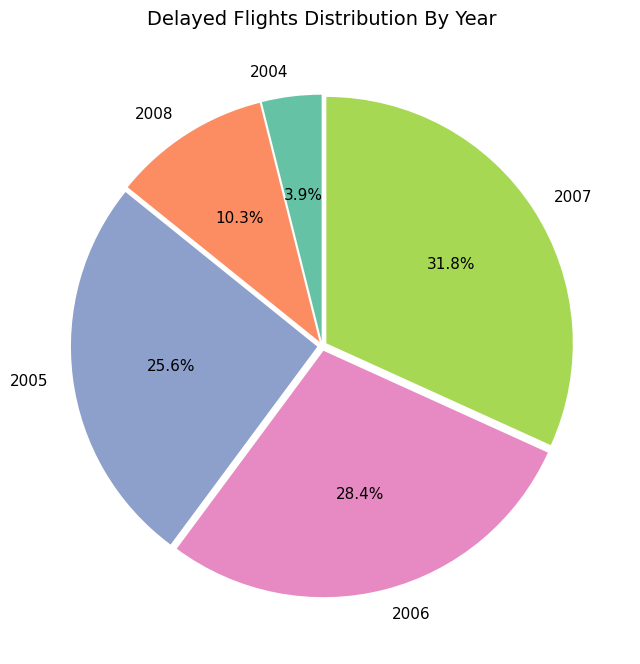

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(delayed_counts_df['DelayedFlights'], labels=delayed_counts_df['Year'],textprops={'fontsize':11},
         autopct='%1.1f%%', startangle=90,colors=sns.color_palette('Set2') 
        ,explode=[0.02]*5)
plt.title(
    label="Delayed Flights Distribution By Year", 
    fontdict={"fontsize":14},
    pad=10
)
plt.show()

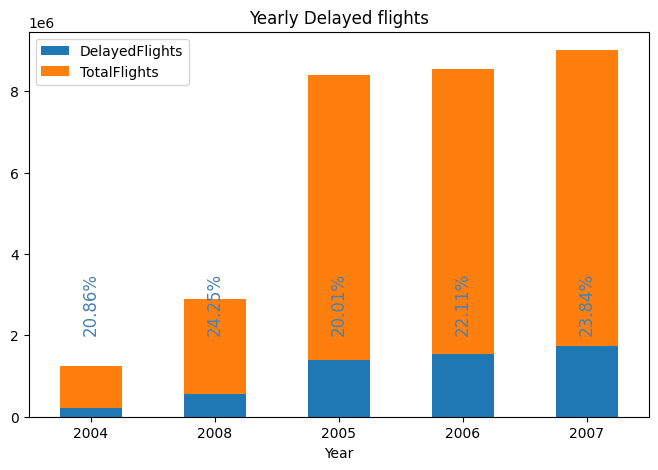

In [ ]:
delayed_counts_df[["Year", "DelayedFlights", "TotalFlights"]].plot(x="Year", kind="bar", \
                                                                     figsize=(8,5), title="Yearly Delayed flights", \
                                                                        rot=0, stacked=True)

# to label percentage of delayed flight on top of each bar
for i,pct in enumerate(delayed_counts_df['Percentage of Delayed Flights']):
    plt.text(x[i] + 0.4, 2000000, f'{pct}%', ha='center', va='bottom',fontsize=12, color='steelblue', rotation=90)

plt.show()

### Month

Visualizing prcentage of delayed flights of all flights and proportion of delayed flights in each month.

In [ ]:
monthly_df_rdd = flights_df.select('Month', 'DelayStatus').rdd
monthly_df_rdd = monthly_df_rdd.map(lambda x: (x[0], (x[1], 1)))\
    .reduceByKey(lambda x,y: (x[0]+y[0], x[1] + y[1]))\
        .sortByKey().map(lambda x: calc_percentage(x)).\
            map(lambda x: (month_map[x[0]], x[1], x[2], x[3]))
monthly_df = monthly_df_rdd.toDF(["Month", "DelayedFlights", "TotalFlights", "Percentage of Delayed Flight"])
monthly_df.show()

+-----+--------------+------------+----------------------------+
|Month|DelayedFlights|TotalFlights|Percentage of Delayed Flight|
+-----+--------------+------------+----------------------------+
|  Jan|        654593|     2895234|                       22.61|
|  Feb|        613851|     2595464|                       23.65|
|  Mar|        553513|     2422467|                       22.85|
|  Apr|        446852|     2352937|                       18.99|
|  May|        331787|     1825998|                       18.17|
|  Jun|        454163|     1794112|                       25.31|
|  Jul|        479873|     1853642|                       25.89|
|  Aug|        435667|     1871905|                       23.27|
|  Sep|        303168|     1728373|                       17.54|
|  Oct|        365069|     1802264|                       20.26|
|  Nov|        331702|     1733184|                       19.14|
|  Dec|        488125|     1736887|                        28.1|
+-----+--------------+---

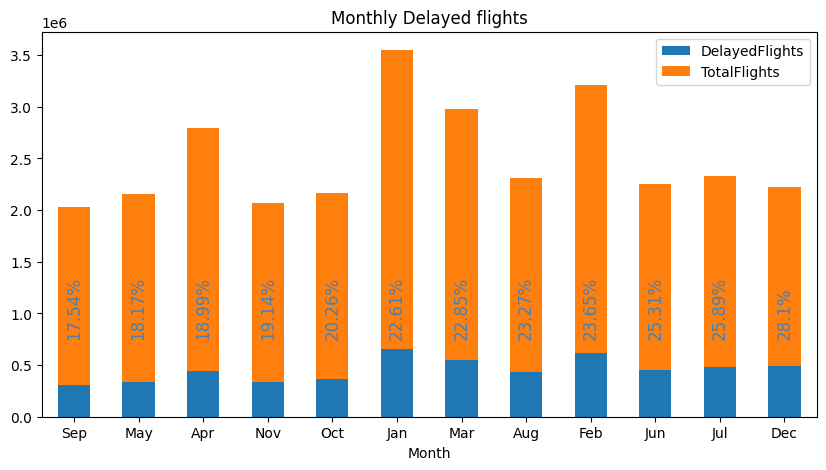

In [ ]:
monthly_df = monthly_df.toPandas().sort_values('Percentage of Delayed Flight')

monthly_df[["Month", "DelayedFlights", "TotalFlights"]].plot(x="Month", kind="bar", \
                                                                        figsize=(10,5), title="Monthly Delayed flights", \
                                                                            rot=0, stacked=True)

# to label percentage of delayed flight on top of each bar
for i,pct in enumerate(monthly_df['Percentage of Delayed Flight']):
    plt.text(x[i] + 0.4, 750000, f'{pct}%', ha='center', va='bottom',fontsize=12, color='steelblue', rotation=90)

plt.show()

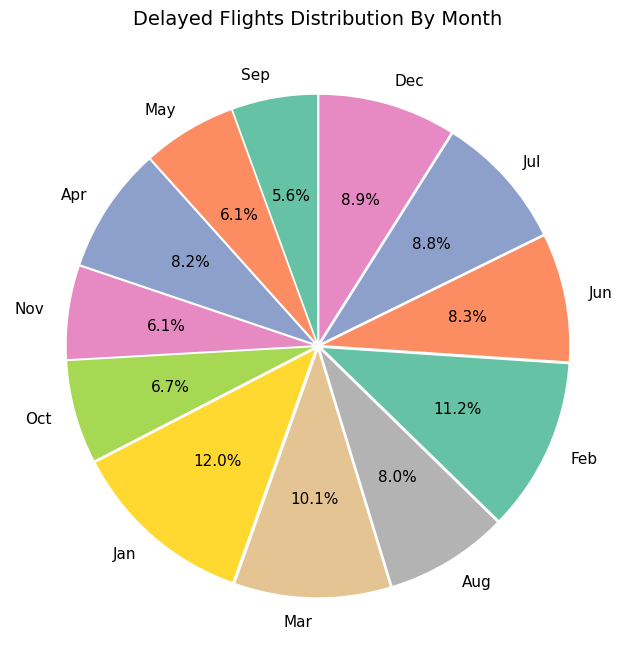

In [ ]:
# plot Delayed Flights Distribution By Month pie chart
plt.figure(figsize=(8,8))
plt.pie(monthly_df['DelayedFlights'], labels=monthly_df['Month'],textprops={'fontsize':11},
         autopct='%1.1f%%', startangle=90,colors=sns.color_palette('Set2') 
        ,explode=[0.02]*12)
plt.title(
    label="Delayed Flights Distribution By Month", 
    fontdict={"fontsize":14},
    pad=10
)
plt.show()

#### Drilling down on days in December

In [ ]:
month12_df_rdd = flights_df.filter(col('Month') == 12).select('DayOfMonth', 'DelayStatus').rdd

day_of_month12_rdd = month12_df_rdd.map(lambda x: (x[0], (x[1], 1))).reduceByKey(lambda x,y: (x[0]+y[0], x[1] + y[1])).sortByKey().map(lambda x: calc_percentage(x))
day_of_month12_rdd = day_of_month12_rdd.toDF(["DayOfMonth", "DelayedFlights", "TotalFlights", "Percentage of Delayed Flight"])
day_of_month12_rdd.show()

+----------+--------------+------------+----------------------------+
|DayOfMonth|DelayedFlights|TotalFlights|Percentage of Delayed Flight|
+----------+--------------+------------+----------------------------+
|         1|         14565|       52414|                       27.79|
|         2|         14146|       54105|                       26.15|
|         3|         11054|       54757|                       20.19|
|         4|         14961|       57434|                       26.05|
|         5|         14409|       57677|                       24.98|
|         6|         11526|       58212|                        19.8|
|         7|         15516|       58185|                       26.67|
|         8|         13556|       54369|                       24.93|
|         9|         15593|       53166|                       29.33|
|        10|         11683|       54094|                        21.6|
|        11|         11427|       56173|                       20.34|
|        12|        

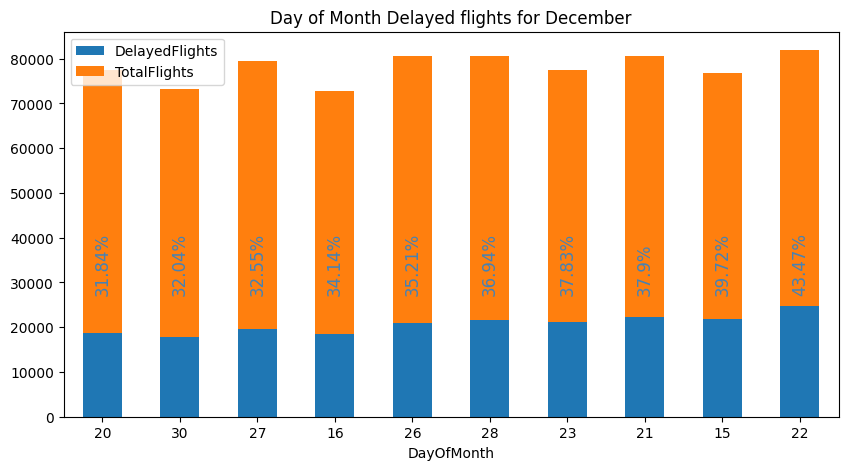

In [ ]:
day_of_month12_df = day_of_month12_rdd.toPandas()
day_of_month12_df = day_of_month12_df.sort_values('Percentage of Delayed Flight')

# select top 10 days with highest percentage of delayed flights
day_of_month12_df = day_of_month12_df.tail(10)
day_of_month12_df[["DayOfMonth", "DelayedFlights", "TotalFlights"]].plot(x="DayOfMonth", kind="bar", \
                                                                        figsize=(10,5), title="Day of Month Delayed flights for December", \
                                                                            rot=0, stacked=True)
# position the percentage on top of each bar
for i,pct in enumerate(day_of_month12_df['Percentage of Delayed Flight']):
    plt.text(x[i] + 0.4, 27000, f'{pct}%', ha='center', va='bottom',fontsize=12, color='steelblue', rotation=90)

### Day of Month

Visualizing  proportion of delayed flights for each day of month.

In [ ]:
day_of_month_rdd = flights_df.select('DayOfMonth', 'DelayStatus').rdd
day_of_month_rdd = day_of_month_rdd.map(lambda x: (x[0], (x[1], 1))).reduceByKey(lambda x,y: (x[0]+y[0], x[1] + y[1])).sortByKey().map(lambda x: calc_percentage(x))
day_of_month_rdd = day_of_month_rdd.toDF(["DayOfMonth", "DelayedFlights", "TotalFlights", "Percentage of Delayed Flight"])
day_of_month_rdd.show()

+----------+--------------+------------+----------------------------+
|DayOfMonth|DelayedFlights|TotalFlights|Percentage of Delayed Flight|
+----------+--------------+------------+----------------------------+
|         1|        175197|      798997|                       21.93|
|         2|        184566|      807581|                       22.85|
|         3|        173496|      801438|                       21.65|
|         4|        170843|      803429|                       21.26|
|         5|        184275|      809089|                       22.78|
|         6|        171914|      814757|                        21.1|
|         7|        174929|      815584|                       21.45|
|         8|        162342|      807030|                       20.12|
|         9|        163512|      813000|                       20.11|
|        10|        168952|      809533|                       20.87|
|        11|        176136|      812834|                       21.67|
|        12|        

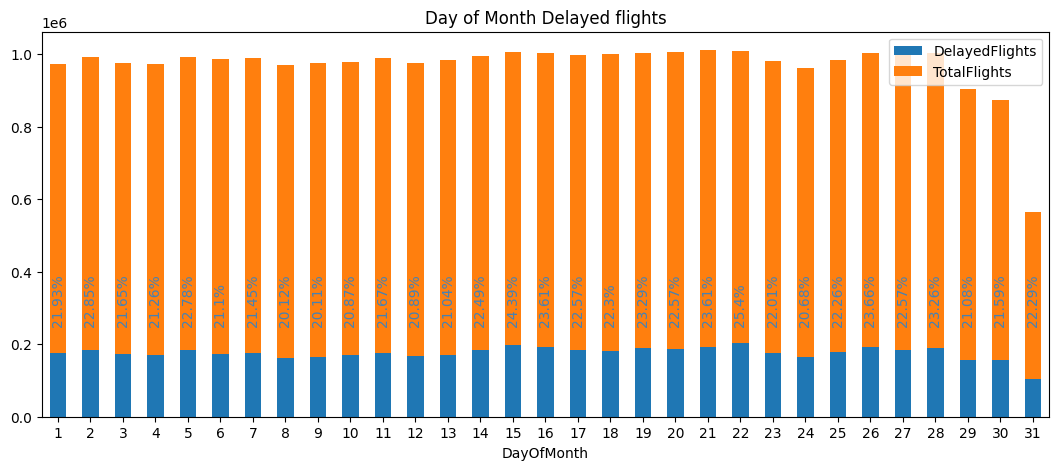

In [ ]:
day_of_month_df = day_of_month_rdd.toPandas()

day_of_month_df[["DayOfMonth", "DelayedFlights", "TotalFlights"]].plot(x="DayOfMonth", kind="bar", \
                                                                        figsize=(13,5), title="Day of Month Delayed flights", \
                                                                            rot=0, stacked=True)
# to label percentage of delayed flight on top of each bar

for i,pct in enumerate(day_of_month_df['Percentage of Delayed Flight']):
    plt.text(x[i] + 0.4, 250000, f'{pct}%', ha='center', va='bottom',fontsize=10, color='steelblue', rotation=90)

plt.show()

### Day of Week

Visualizing prcentage of delayed flights of all flights and proportion of delayed flights in each day of the week.

In [ ]:
weekday_df_rdd = flights_df.select('DayOfWeek', 'DelayStatus').rdd
weekday_df_rdd = weekday_df_rdd.map(lambda x: (x[0], (x[1], 1)))\
    .reduceByKey(lambda x,y: (x[0]+y[0], x[1] + y[1]))\
        .sortByKey().map(lambda x: calc_percentage(x)).\
            map(lambda x: (day_map[x[0]], x[1], x[2], x[3]))
weekday_df = weekday_df_rdd.toDF(["DayOfWeek", "DelayedFlights", "TotalFlights", "Percentage of Delayed Flight"])
weekday_df.show()

+---------+--------------+------------+----------------------------+
|DayOfWeek|DelayedFlights|TotalFlights|Percentage of Delayed Flight|
+---------+--------------+------------+----------------------------+
|      Mon|        819074|     3618653|                       22.63|
|      Tue|        715352|     3562158|                       20.08|
|      Wed|        766391|     3595291|                       21.32|
|      Thu|        886134|     3622871|                       24.46|
|      Fri|        936380|     3637589|                       25.74|
|      Sat|        573513|     3122733|                       18.37|
|      Sun|        761519|     3453172|                       22.05|
+---------+--------------+------------+----------------------------+



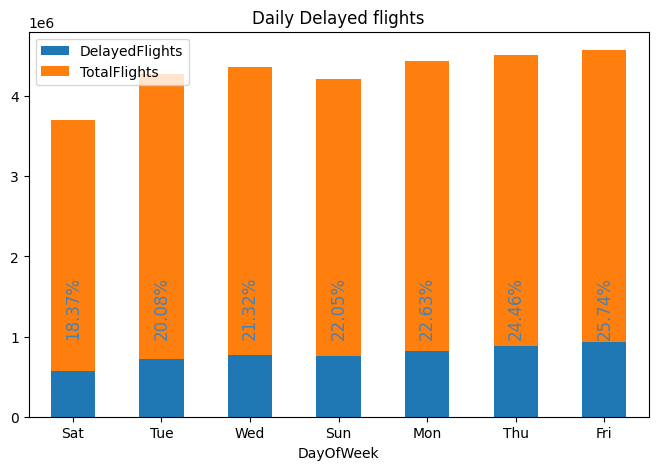

In [ ]:
weekday_df = weekday_df.toPandas().sort_values('Percentage of Delayed Flight')

# plot Delayed Flights proportion By Month
weekday_df[["DayOfWeek", "DelayedFlights", "TotalFlights"]].plot(x="DayOfWeek", kind="bar", \
                                                                        figsize=(8,5), title="Daily Delayed flights", \
                                                                            rot=0, stacked=True)
# to label percentage of delayed flight on top of each bar

for i,pct in enumerate(weekday_df['Percentage of Delayed Flight']):
    plt.text(x[i] + 0.4, 970000, f'{pct}%', ha='center', va='bottom',fontsize=12, color='steelblue', rotation=90)

plt.show()

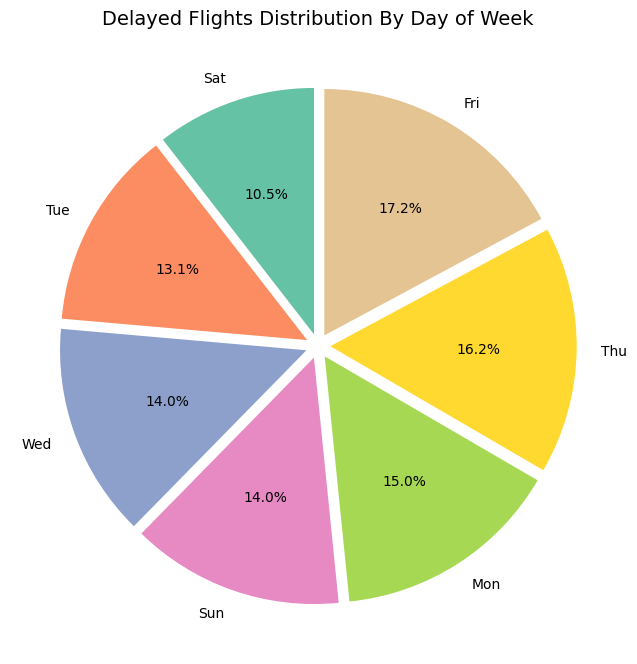

In [ ]:
# plot Delayed Flights Distribution By Day of Week pie chart
plt.figure(figsize=(8,8))
plt.pie(weekday_df['DelayedFlights'], labels=weekday_df['DayOfWeek'], autopct='%1.1f%%', startangle=90,colors=sns.color_palette('Set2') 
        ,explode=[0.05]*7)
plt.title(
    label="Delayed Flights Distribution By Day of Week", 
    fontdict={"fontsize":14},
    pad=10
)
plt.show()

### Departure time

Visualizing prcentage of delayed flights of all flights and proportion of delayed flights in each departure time group.

<p> We'll group into: </p>

- early morning 5 am - 8 am
- morning 8 am - 12 pm
- afternoon 12 pm - 5 pm
- evening 5pm - 8 pm
- night 8 pm - 12 am
- latenight 12am - 5am


In [ ]:
def group_by_time(x):
    # x = row[0]
    if x >= 500 and x < 800:
        return "Early Morning: 05:00 - 07:59"
    elif x >= 800 and x < 1200:
        return "Morning: 08:00 - 11:59"
    elif x >= 1200 and x < 1700:
        return "Afternoon: 12:00 - 16:59"
    elif x >= 1700 and x < 2000:
        return "Evening: 17:00 - 19:59"
    elif x >= 2000 and x < 2400:
        return "Night: 20:00 - 23:59"
    else:
        return "Late Night: 00:00 - 04:59"

In [ ]:
labels = ['Late Night: 00:00 - 04:59', 'Morning: 08:00 - 11:59', 'Early Morning: 05:00 - 07:59', 'Night: 20:00 - 23:59', 'Afternoon: 12:00 - 16:59', 'Evening: 17:00 - 19:59']

In [ ]:
time_df_rdd = flights_df.select('CRSDepTime', 'DelayStatus').rdd
time_df_rdd = time_df_rdd.map(lambda x: (group_by_time(x[0]), (x[1], 1)))\
                .reduceByKey(lambda x,y: (x[0]+y[0], x[1] + y[1]))\
                    .map(lambda x: calc_percentage(x))
                
time_df = time_df_rdd.toDF(["Time", "DelayedFlights", "TotalFlights", "Percentage of Delayed Flight"])
time_df.show()

+--------------------+--------------+------------+----------------------------+
|                Time|DelayedFlights|TotalFlights|Percentage of Delayed Flight|
+--------------------+--------------+------------+----------------------------+
|Afternoon: 12:00 ...|       1885875|     7743425|                       24.35|
|Late Night: 00:00...|          9264|       54018|                       17.15|
|Night: 20:00 - 23:59|        655387|     2271052|                       28.86|
|Early Morning: 05...|        402073|     3495601|                        11.5|
|Morning: 08:00 - ...|       1119106|     6485683|                       17.26|
|Evening: 17:00 - ...|       1386658|     4562688|                       30.39|
+--------------------+--------------+------------+----------------------------+



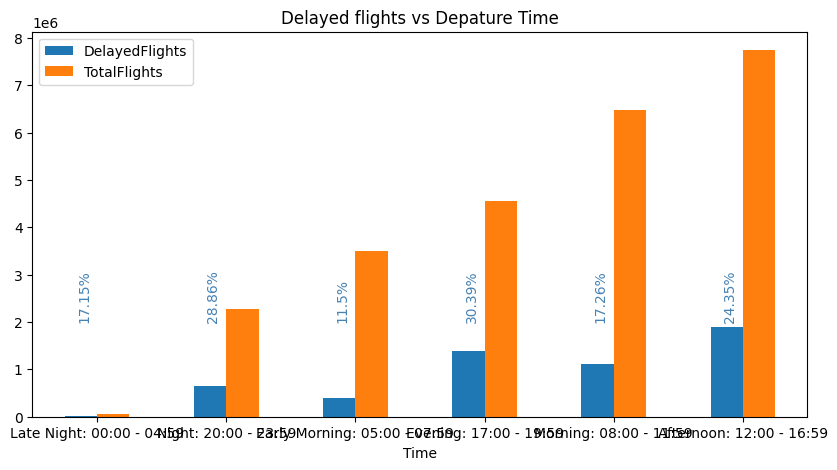

In [ ]:
time_df = time_df.toPandas().sort_values('TotalFlights')

time_df[["Time", "DelayedFlights", "TotalFlights"]].plot(x="Time", kind="bar", \
                                                                        figsize=(10,5), title="Delayed flights vs Depature Time", \
                                                                            rot=0)

for i,pct in enumerate(time_df['Percentage of Delayed Flight']):
    plt.text(x[i] + 0.3, 2000000, f'{pct}%', ha='center', va='bottom',fontsize=10, color='steelblue', rotation=90)

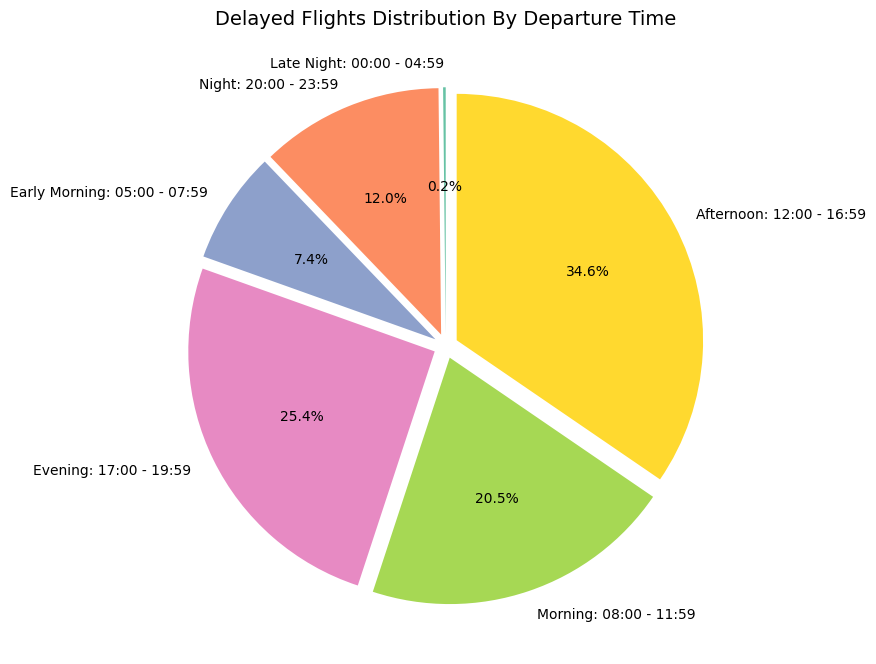

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(time_df['DelayedFlights'], labels=time_df['Time'], autopct='%1.1f%%', startangle=90,colors=sns.color_palette('Set2') 
        ,explode=[0.05]*6)
plt.title(
    label="Delayed Flights Distribution By Departure Time", 
    fontdict={"fontsize":14},
    pad=10
)
plt.show()

### Arrival time

Visualizing prcentage of delayed flights of all flights and proportion of delayed flights in each arrival time group.


In [ ]:
def group_by_time(x):
    # x = row[0]
    if x >= 500 and x < 800:
        return "Early Morning"
    elif x >= 800 and x < 1200:
        return "Morning"
    elif x >= 1200 and x < 1700:
        return "Afternoon"
    elif x >= 1700 and x < 2000:
        return "Evening"
    elif x >= 2000 and x < 2400:
        return "Night"
    else:
        return "Late Night"

In [ ]:
time_df_rdd = flights_df.select('CRSArrTime', 'DelayStatus').rdd
time_df_rdd = time_df_rdd.map(lambda x: (group_by_time(x[0]), (x[1], 1)))\
                .reduceByKey(lambda x,y: (x[0]+y[0], x[1] + y[1]))\
                    .map(lambda x: calc_percentage(x))
                
time_df = time_df_rdd.toDF(["Arrival Time", "DelayedFlights", "TotalFlights", "Percentage of Delayed Flight"])
time_df.show()

+-------------+--------------+------------+----------------------------+
| Arrival Time|DelayedFlights|TotalFlights|Percentage of Delayed Flight|
+-------------+--------------+------------+----------------------------+
|   Late Night|         66242|      235074|                       28.18|
|      Morning|        829975|     5800171|                       14.31|
|Early Morning|        135028|     1183502|                       11.41|
|    Afternoon|       1616116|     7821351|                       20.66|
|        Night|       1491657|     4843383|                        30.8|
|      Evening|       1319345|     4728986|                        27.9|
+-------------+--------------+------------+----------------------------+



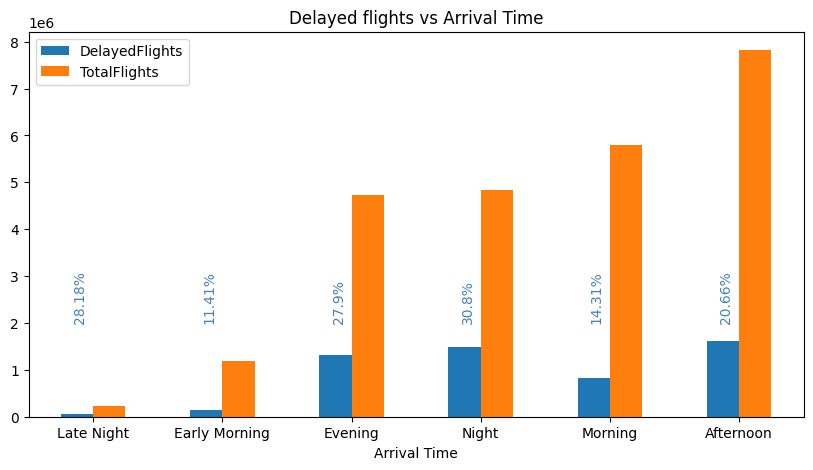

In [ ]:
time_df = time_df.toPandas().sort_values('TotalFlights')

time_df[["Arrival Time", "DelayedFlights", "TotalFlights"]].plot(x="Arrival Time", kind="bar", \
                                                                        figsize=(10,5), title="Delayed flights vs Arrival Time", \
                                                                            rot=0)

for i,pct in enumerate(time_df['Percentage of Delayed Flight']):
    plt.text(x[i] + 0.3, 2000000, f'{pct}%', ha='center', va='bottom',fontsize=10, color='steelblue', rotation=90)

plt.show()

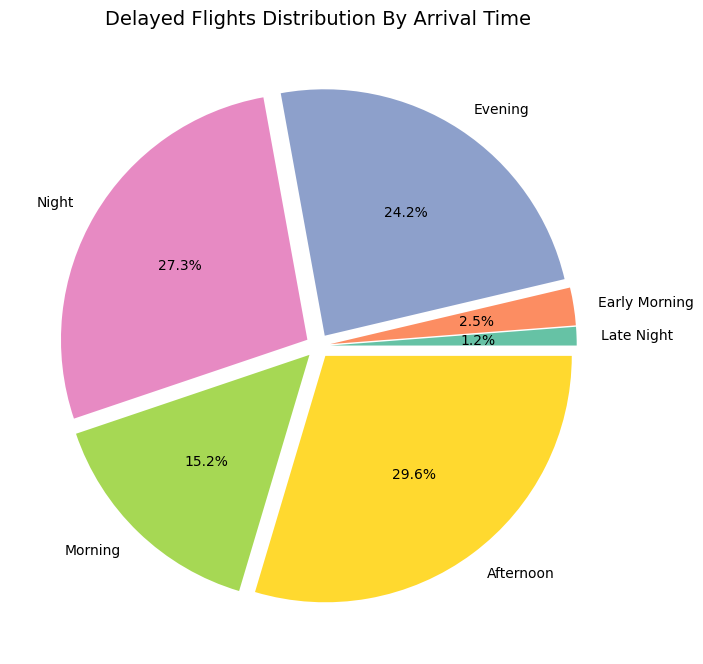

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(time_df['DelayedFlights'], labels=time_df['Arrival Time'], autopct='%1.1f%%',colors=sns.color_palette('Set2') 
        ,explode=[0.05]*6)
plt.title(
    label="Delayed Flights Distribution By Arrival Time", 
    fontdict={"fontsize":14},
    pad=10
)
plt.show()

# Looking at Cancelled Flight

Union of cancelled flights and all flights

In [ ]:
# load the Parquet file as a DataFrame
flights_df = spark.read.parquet("updated_data.parquet")
flights_df.printSchema()

root
 |-- year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- DayofMonth: integer (nullable = true)
 |-- DayOfWeek: integer (nullable = true)
 |-- DepTime: integer (nullable = true)
 |-- CRSDepTime: integer (nullable = true)
 |-- ArrTime: integer (nullable = true)
 |-- CRSArrTime: integer (nullable = true)
 |-- UniqueCarrier: string (nullable = true)
 |-- FlightNum: integer (nullable = true)
 |-- TailNum: string (nullable = true)
 |-- ActualElapsedTime: integer (nullable = true)
 |-- CRSElapsedTime: integer (nullable = true)
 |-- AirTime: integer (nullable = true)
 |-- ArrDelay: integer (nullable = true)
 |-- DepDelay: integer (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Distance: integer (nullable = true)
 |-- TaxiIn: integer (nullable = true)
 |-- TaxiOut: integer (nullable = true)
 |-- Cancelled: integer (nullable = true)
 |-- CancellationCode: string (nullable = true)
 |-- Diverted: integer (nullable = true)

In [ ]:
all_flights_rdd = flights_rdd.union(cancelled_flights_df.rdd)

### Yearly

Visualizing prcentage of cancelled flights of all flights and proportion of delayeded flights in each year.

In [ ]:
# Show yearly total cancelled flights
delayed_counts_rdd = all_flights_rdd.map(lambda x: (x[0],(x[21], 1)))\
    .reduceByKey(lambda x,y: (x[0]+y[0], x[1] + y[1]))\
        .sortByKey().map(lambda x: calc_percentage(x))
delayed_counts_rdd.toDF(["Year", "CancelledFlights", "TotalFlights",'Percentage of Cancelled Flights']).show()

+----+----------------+------------+-------------------------------+
|Year|CancelledFlights|TotalFlights|Percentage of Cancelled Flights|
+----+----------------+------------+-------------------------------+
|2004|           25543|     1046961|                           2.44|
|2005|          133730|     7126568|                           1.88|
|2006|          121934|     7125736|                           1.71|
|2007|          160748|     7436036|                           2.16|
|2008|           64442|     2383563|                            2.7|
+----+----------------+------------+-------------------------------+



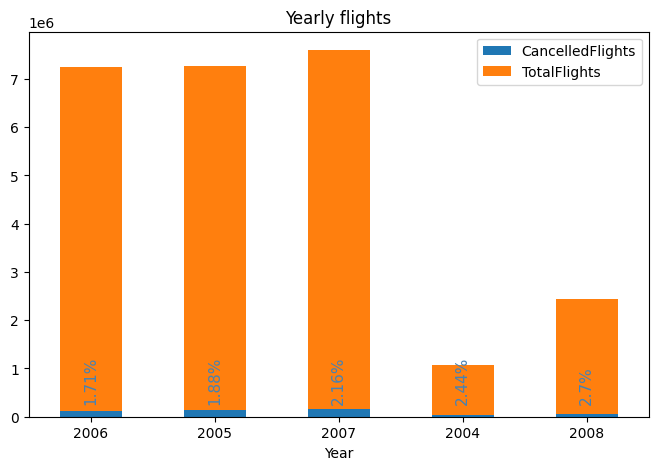

In [ ]:
delayed_counts_df = delayed_counts_rdd.toDF(["Year", "CancelledFlights", "TotalFlights",'Percentage of Cancelled Flights']).toPandas().sort_values('CancelledFlights')

delayed_counts_df = delayed_counts_df.sort_values('Percentage of Cancelled Flights')

delayed_counts_df[["Year", "CancelledFlights", "TotalFlights"]].plot(x="Year", kind="bar", \
                                                                     figsize=(8,5), title="Yearly flights", \
                                                                        rot=0, stacked=True)
x = [-0.4,0.6,1.6,2.6,3.6,4.6,5.6,6.6,7.6,8.6,9.6,10.6,11.6]
for i,pct in enumerate(delayed_counts_df['Percentage of Cancelled Flights']):
    plt.text(x[i] + 0.4, 250000, f'{pct}%', ha='center', va='bottom',fontsize=11, color='steelblue', rotation=90)

plt.show()

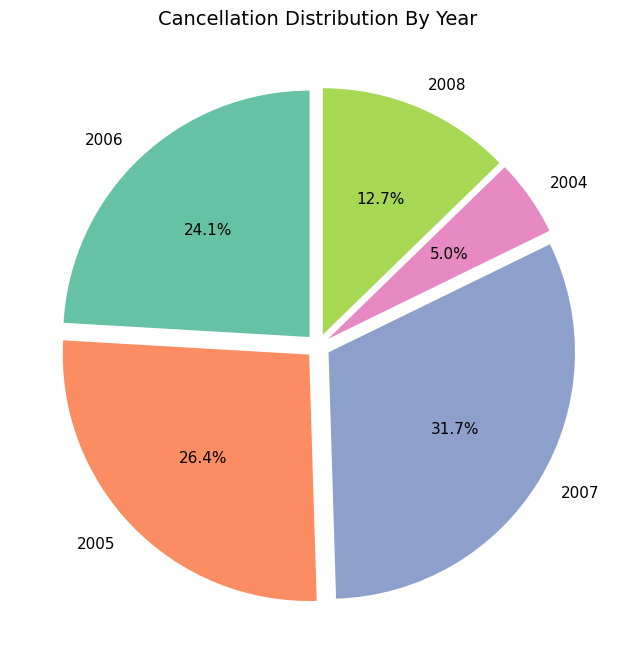

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(delayed_counts_df['CancelledFlights'], labels=delayed_counts_df['Year'],textprops={'fontsize':11},
         autopct='%1.1f%%', startangle=90,colors=sns.color_palette('Set2') 
        ,explode=[0.05]*5)
plt.title(
    label="Cancellation Distribution By Year", 
    fontdict={"fontsize":14},
    pad=10
)
plt.show()

### Monthly

Visualizing prcentage of cancelled flights of all flights and proportion of delayed flights in each month.

In [ ]:
monthly_df_rdd = all_flights_rdd.map(lambda x: (x[1], (x[21], 1)))\
    .reduceByKey(lambda x,y: (x[0]+y[0], x[1] + y[1]))\
        .sortByKey().map(lambda x: calc_percentage(x)).\
            map(lambda x: (month_map[x[0]], x[1], x[2], x[3]))
monthly_df_rdd.toDF(["Month", "CancelledFlights", "TotalFlights", "Percentage of Cancelled Flight"]).show()

+-----+----------------+------------+------------------------------+
|Month|CancelledFlights|TotalFlights|Percentage of Cancelled Flight|
+-----+----------------+------------+------------------------------+
|  Jan|           85567|     2980801|                          2.87|
|  Feb|           74791|     2670255|                           2.8|
|  Mar|           50815|     2473282|                          2.05|
|  Apr|           35629|     2388566|                          1.49|
|  May|           19775|     1845773|                          1.07|
|  Jun|           37247|     1831359|                          2.03|
|  Jul|           38092|     1891734|                          2.01|
|  Aug|           35530|     1907435|                          1.86|
|  Sep|           27989|     1756362|                          1.59|
|  Oct|           29201|     1831465|                          1.59|
|  Nov|           21423|     1754607|                          1.22|
|  Dec|           50338|     17872

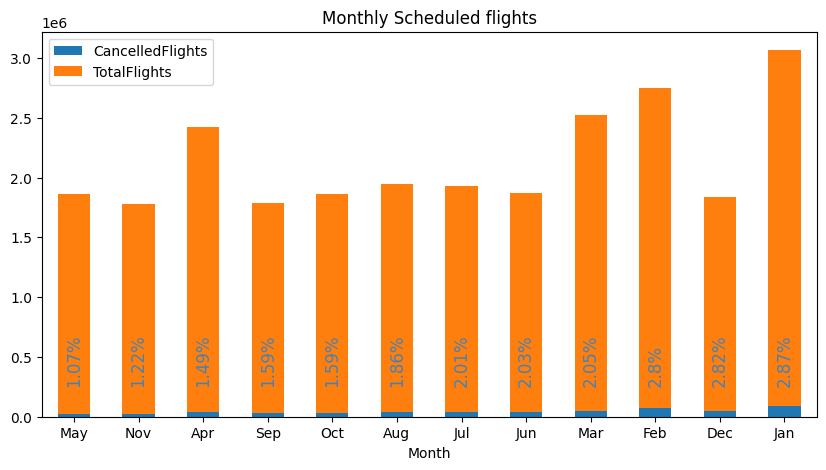

In [ ]:
monthly_df = monthly_df_rdd.toDF(["Month", "CancelledFlights", "TotalFlights",'Percentage of Cancelled Flights']).toPandas().sort_values('Percentage of Cancelled Flights')
monthly_df[["Month", "CancelledFlights", "TotalFlights"]].plot(x="Month", kind="bar", \
                                                                     figsize=(10,5), title="Monthly Scheduled flights", \
                                                                        rot=0, stacked=True)
x = [-0.4,0.6,1.6,2.6,3.6,4.6,5.6,6.6,7.6,8.6,9.6,10.6,11.6]
for i,pct in enumerate(monthly_df['Percentage of Cancelled Flights']):
    plt.text(x[i] + 0.4, 250000, f'{pct}%', ha='center', va='bottom',fontsize=12, color='steelblue', rotation=90)

plt.show()


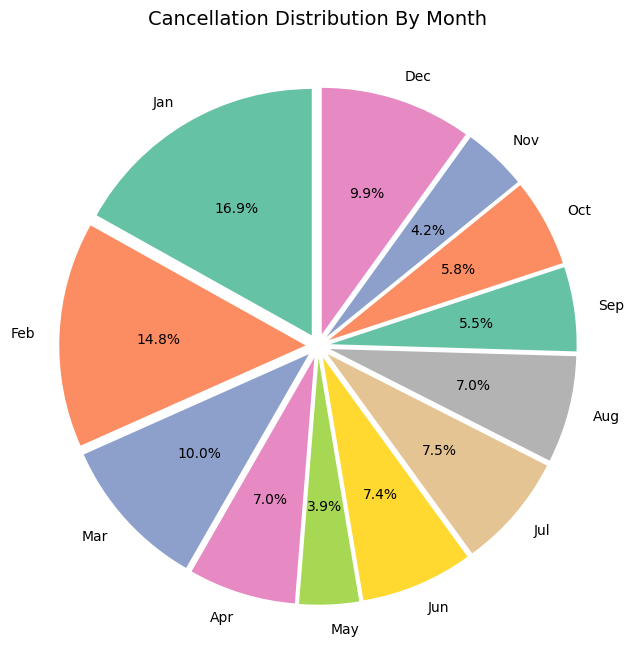

In [ ]:
# cancelled flight by month
m_can = cancelled_flights_df.rdd.map(lambda x: ((x[1]), (x[21], 1)))\
    .reduceByKey(lambda x,y: (x[0]+y[0], x[1] + y[1]))\
        .sortByKey().map(lambda x:( month_map[x[0]], x[1][0] )).\
           toDF(["Month", "CancelledFlights"]).toPandas()

plt.figure(figsize=(8,8))
plt.pie(m_can['CancelledFlights'], labels=m_can['Month'], autopct='%1.1f%%', startangle=90,colors=sns.color_palette('Set2') 
        ,explode=[0.05]*12)
plt.title(
    label="Cancellation Distribution By Month", 
    fontdict={"fontsize":14},
    pad=10
)
plt.show()

#### Drilling on days in January, February & December

In [ ]:
month1 = flights_df.filter(col('Month') == 1).select('DayofMonth', 'CRSDepTime', 'CRSArrTime', 'Cancelled')
month1_rdd = month1.rdd.map(lambda x: (x[0], (x[3],1))).reduceByKey(lambda x,y: (x[0]+y[0], x[1]+y[1])).sortByKey().map(lambda x: calc_percentage(x))
month1_day = month1_rdd.toDF(["Day", "CancelledFlights", "TotalFlights", "Percentage of Cancelled Flight"]).toPandas().sort_values('Percentage of Cancelled Flight')
month1_day = month1_day.tail(10)

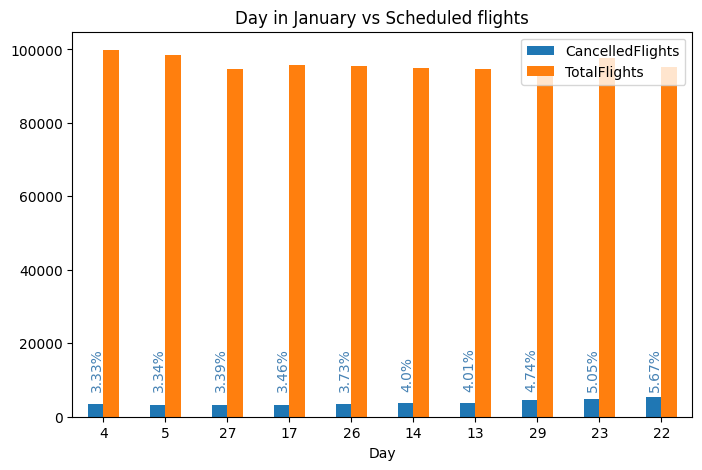

In [ ]:
month1_day[["Day", "CancelledFlights", "TotalFlights"]].plot(x="Day", kind="bar", \
                                                                        figsize=(8,5), title="Day in January vs Scheduled flights", \
                                                                            rot=0)

for i,pct in enumerate(month1_day['Percentage of Cancelled Flight']):
    plt.text(x[i] + 0.3, 7000, f'{pct}%', ha='center', va='bottom',fontsize=10, color='steelblue', rotation=90)

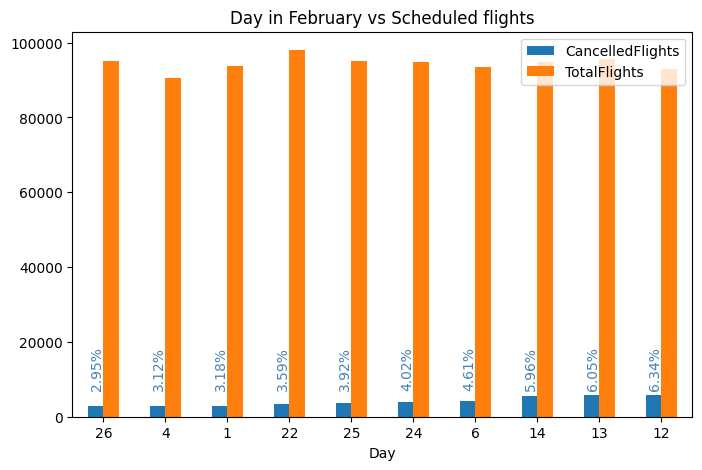

In [ ]:
month2 = flights_df.filter(col('Month') == 2).select('DayofMonth', 'CRSDepTime', 'CRSArrTime', 'Cancelled')
month2_rdd = month2.rdd.map(lambda x: (x[0], (x[3],1))).reduceByKey(lambda x,y: (x[0]+y[0], x[1]+y[1])).sortByKey().map(lambda x: calc_percentage(x))
month2_day = month2_rdd.toDF(["Day", "CancelledFlights", "TotalFlights", "Percentage of Cancelled Flight"]).toPandas().sort_values('Percentage of Cancelled Flight')
month2_day = month2_day.tail(10)

month2_day[["Day", "CancelledFlights", "TotalFlights"]].plot(x="Day", kind="bar", \
                                                                        figsize=(8,5), title="Day in February vs Scheduled flights", \
                                                                            rot=0)

for i,pct in enumerate(month2_day['Percentage of Cancelled Flight']):
    plt.text(x[i] + 0.3, 7000, f'{pct}%', ha='center', va='bottom',fontsize=10, color='steelblue', rotation=90)

In [ ]:
month12 = flights_df.filter(col('Month') == 12).select('DayofMonth', 'CRSDepTime', 'CRSArrTime', 'Cancelled')
month12.show()

+----------+----------+----------+---------+
|DayofMonth|CRSDepTime|CRSArrTime|Cancelled|
+----------+----------+----------+---------+
|        13|       600|       747|        0|
|        14|       600|       747|        0|
|        15|       610|       757|        0|
|        16|       610|       756|        0|
|        17|       610|       756|        0|
|        18|       610|       756|        0|
|        19|       610|       756|        0|
|        20|       610|       756|        0|
|        21|       610|       756|        0|
|        22|       610|       756|        0|
|        23|       610|       756|        0|
|        24|       610|       756|        0|
|        25|       610|       756|        0|
|        26|       610|       756|        0|
|        27|       610|       756|        0|
|        28|       610|       756|        0|
|        29|       610|       756|        0|
|        30|       610|       756|        0|
|        31|       610|       756|        0|
|         

In [ ]:
month12_rdd = month12.rdd
month12_rdd_day = month12_rdd.map(lambda x: (x[0], (x[3],1))).reduceByKey(lambda x,y: (x[0]+y[0], x[1]+y[1])).sortByKey().map(lambda x: calc_percentage(x))
month12_rdd_day.toDF(["Day", "CancelledFlights", "TotalFlights", "Percentage of Cancelled Flight"]).show()

+---+----------------+------------+------------------------------+
|Day|CancelledFlights|TotalFlights|Percentage of Cancelled Flight|
+---+----------------+------------+------------------------------+
|  1|            3930|       56509|                          6.95|
|  2|            1540|       55738|                          2.76|
|  3|             983|       55794|                          1.76|
|  4|            1069|       58586|                          1.82|
|  5|            1524|       59300|                          2.57|
|  6|            1051|       59332|                          1.77|
|  7|            1649|       59930|                          2.75|
|  8|            1895|       56414|                          3.36|
|  9|            2386|       55676|                          4.29|
| 10|            1486|       55715|                          2.67|
| 11|            2241|       58543|                          3.83|
| 12|            1187|       59420|                           

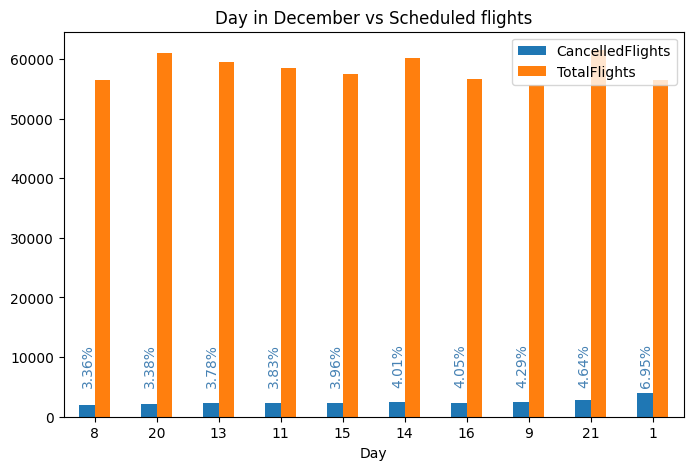

In [ ]:
month12_rdd_day = month12_rdd_day.toDF(["Day", "CancelledFlights", "TotalFlights", "Percentage of Cancelled Flight"])\
    .toPandas().sort_values('Percentage of Cancelled Flight')

month12_rdd_day = month12_rdd_day.tail(10)

month12_rdd_day[["Day", "CancelledFlights", "TotalFlights"]].plot(x="Day", kind="bar", \
                                                                        figsize=(8,5), title="Day in December vs Scheduled flights", \
                                                                            rot=0)

for i,pct in enumerate(month12_rdd_day['Percentage of Cancelled Flight']):
    plt.text(x[i] + 0.3, 5000, f'{pct}%', ha='center', va='bottom',fontsize=10, color='steelblue', rotation=90)

### Day Of Month

In [ ]:
day_of_month_rdd = all_flights_rdd.map(lambda x: (x[2], (x[21], 1)))\
    .reduceByKey(lambda x,y: (x[0]+y[0], x[1] + y[1]))\
        .sortByKey().map(lambda x: calc_percentage(x))
day_of_month_rdd.toDF(["DayOfMonth", "CancelledFlights", "TotalFlights", "Percentage of Cancelled Flight"]).show()

+----------+----------------+------------+------------------------------+
|DayOfMonth|CancelledFlights|TotalFlights|Percentage of Cancelled Flight|
+----------+----------------+------------+------------------------------+
|         1|           18146|      817143|                          2.22|
|         2|           16044|      823625|                          1.95|
|         3|           13761|      815199|                          1.69|
|         4|           15143|      818572|                          1.85|
|         5|           15293|      824382|                          1.86|
|         6|           16720|      831477|                          2.01|
|         7|           14460|      830044|                          1.74|
|         8|           15954|      822984|                          1.94|
|         9|           14633|      827633|                          1.77|
|        10|           15963|      825496|                          1.93|
|        11|           17618|      830

In [ ]:
day_of_month_df = day_of_month_rdd.toDF(["DayOfMonth", "CancelledFlights", "TotalFlights", "Percentage of Cancelled Flight"])\
    .toPandas().sort_values('Percentage of Cancelled Flight')

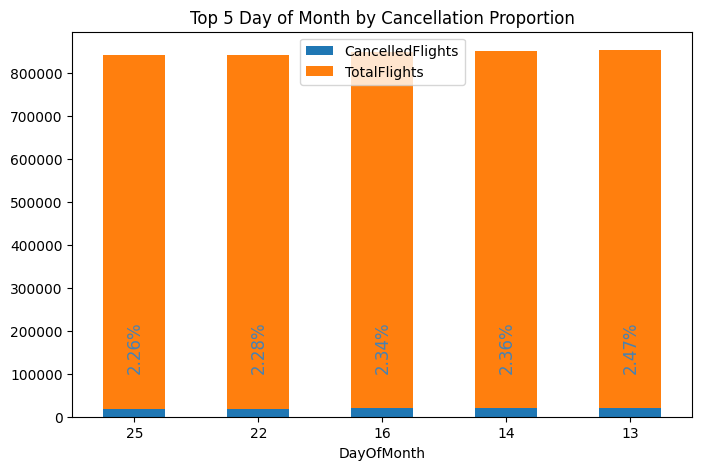

In [ ]:
day_of_month_df = day_of_month_df.tail(5)

day_of_month_df[["DayOfMonth", "CancelledFlights", "TotalFlights"]].plot(x="DayOfMonth", kind="bar", \
                                                                         figsize=(8,5), title="Top 5 Day of Month by Cancellation Proportion", \
                                                                        rot=0, stacked=True)

for i,pct in enumerate(day_of_month_df['Percentage of Cancelled Flight']):
    plt.text(x[i] + 0.4, 100000, f'{pct}%', ha='center', va='bottom',fontsize=12, color='steelblue', rotation=90)

### Day of Week

In [ ]:
weekday_df_rdd = all_flights_rdd.map(lambda x: (x[3], (x[21], 1)))\
    .reduceByKey(lambda x,y: (x[0]+y[0], x[1] + y[1]))\
        .sortByKey().map(lambda x: calc_percentage(x)).\
            map(lambda x: (day_map[x[0]], x[1], x[2], x[3]))
weekday_df = weekday_df_rdd.toDF(["DayOfWeek", "CancelledFlights", "TotalFlights", "Percentage of Cancelled Flight"])
weekday_df.show()

+---------+----------------+------------+------------------------------+
|DayOfWeek|CancelledFlights|TotalFlights|Percentage of Cancelled Flight|
+---------+----------------+------------+------------------------------+
|      Mon|           74175|     3692828|                          2.01|
|      Tue|           78119|     3640277|                          2.15|
|      Wed|           80310|     3675601|                          2.18|
|      Thu|           79045|     3701916|                          2.14|
|      Fri|           78121|     3715710|                           2.1|
|      Sat|           52853|     3175586|                          1.66|
|      Sun|           63774|     3516946|                          1.81|
+---------+----------------+------------+------------------------------+



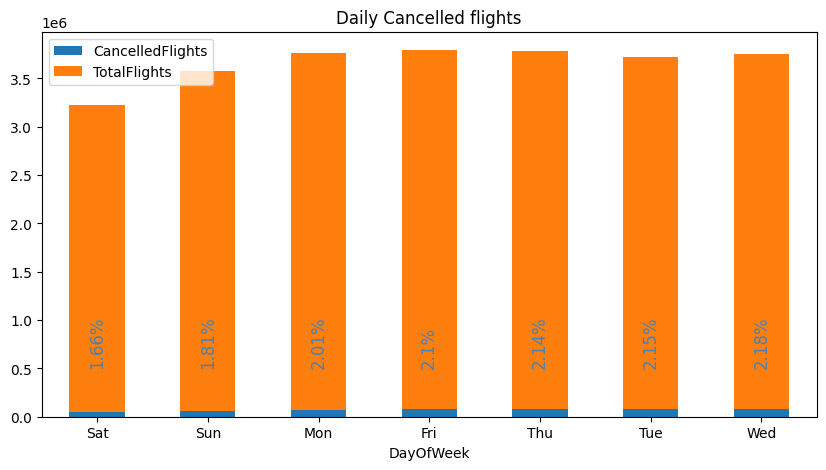

In [ ]:
weekday_df = weekday_df.toPandas().sort_values('Percentage of Cancelled Flight')

ax= weekday_df[["DayOfWeek", "CancelledFlights", "TotalFlights"]].plot(x="DayOfWeek", kind="bar", \
                                                                        figsize=(10,5), title="Daily Cancelled flights", \
                                                                        rot=0, stacked=True)

x = [-0.4,0.6,1.6,2.6,3.6,4.6,5.6]
for i,pct in enumerate(weekday_df['Percentage of Cancelled Flight']):
    plt.text(x[i] + 0.4, 500000, f'{pct}%', ha='center', va='bottom',fontsize=12, color='steelblue', rotation=90)

plt.show()

In [ ]:
weekday_df

,DayOfWeek,CancelledFlights,TotalFlights,Percentage of Cancelled Flight
5,Sat,52853,3175586,1.66
6,Sun,63774,3516946,1.81
0,Mon,74175,3692828,2.01
4,Fri,78121,3715710,2.10
3,Thu,79045,3701916,2.14
1,Tue,78119,3640277,2.15
2,Wed,80310,3675601,2.18


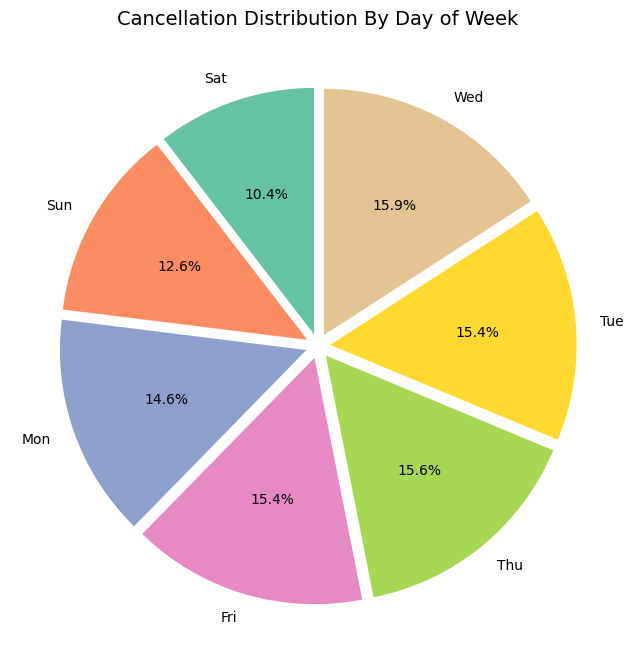

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(weekday_df['CancelledFlights'], labels=weekday_df['DayOfWeek'], autopct='%1.1f%%', startangle=90,colors=sns.color_palette('Set2') 
        ,explode=[0.05]*7)
plt.title(
    label="Cancellation Distribution By Day of Week", 
    fontdict={"fontsize":14},
    pad=10
)
plt.show()

### Departure time

<p> We'll group into: </p>

- early morning 5 am - 8 am
- morning 8 am - 12 pm
- afternoon 12 pm - 5 pm
- evening 5pm - 8 pm
- night 8 pm - 12 am
- latenight 12am - 5am


In [ ]:
time_df_rdd = all_flights_rdd.map(lambda x: (group_by_time(x[5]), (x[21], 1)))\
                .reduceByKey(lambda x,y: (x[0]+y[0], x[1] + y[1]))\
                    .map(lambda x: calc_percentage(x))
                
time_df = time_df_rdd.toDF(["Time", "CancelledFlights", "TotalFlights", "Percentage of Cancelled Flight"])
# time_df.show()

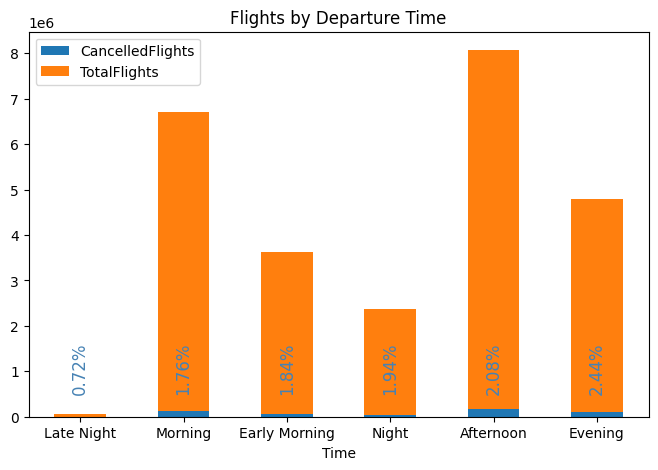

In [ ]:
time_df = time_df.toPandas().sort_values('Percentage of Cancelled Flight')

ax = time_df[["Time", "CancelledFlights", "TotalFlights"]].plot(x="Time", kind="bar", \
                                                                        figsize=(8,5), title="Flights by Departure Time", \
                                                                        rot=0, stacked=True)

x = [-0.4,0.6,1.6,2.6,3.6,4.6]
for i,pct in enumerate(time_df['Percentage of Cancelled Flight']):
    plt.text(x[i] + 0.4, 500000, f'{pct}%', ha='center', va='bottom',fontsize=12, color='steelblue', rotation=90)

plt.show()

In [ ]:
time_df['CancelledFlights']

4       390
0    116408
1     65696
3     44925
2    164888
5    114090
Name: CancelledFlights, dtype: int64

In [ ]:
time_df['Time']

4       Late Night
0          Morning
1    Early Morning
3            Night
2        Afternoon
5          Evening
Name: Time, dtype: object

In [ ]:
labels = ['Late Night: 00:00 - 04:59', 'Morning: 08:00 - 11:59', 'Early Morning: 05:00 - 07:59', 'Night: 20:00 - 23:59', 'Afternoon: 12:00 - 16:59', 'Evening: 17:00 - 19:59']

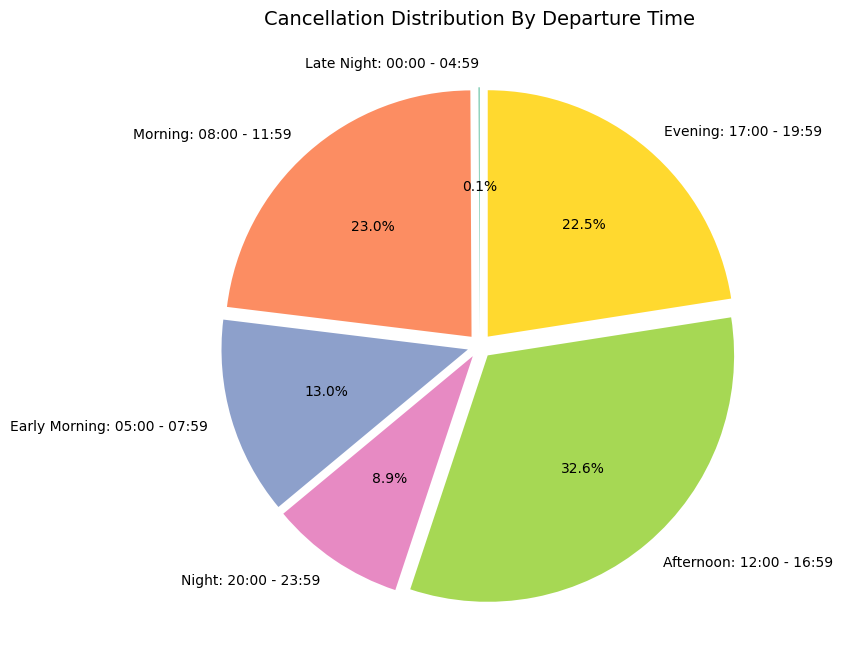

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(time_df['CancelledFlights'], labels=labels, autopct='%1.1f%%', startangle=90,colors=sns.color_palette('Set2') 
        ,explode=[0.05]*len(labels))
plt.title(
    label="Cancellation Distribution By Departure Time", 
    fontdict={"fontsize":14},
    pad=10
)
plt.show()

### Arrival time

<p> We'll group into: </p>

- early morning 5 am - 8 am
- morning 8 am - 12 pm
- afternoon 12 pm - 5 pm
- evening 5pm - 8 pm
- night 8 pm - 12 am
- latenight 12am - 5am

In [ ]:
time_df_rdd = all_flights_rdd.map(lambda x: (group_by_time(x[7]), (x[21], 1)))\
                .reduceByKey(lambda x,y: (x[0]+y[0], x[1] + y[1]))\
                    .map(lambda x: calc_percentage(x))
                
time_df = time_df_rdd.toDF(["Time", "CancelledFlights", "TotalFlights", "Percentage of Cancelled Flight"])
time_df.show()

+-------------+----------------+------------+------------------------------+
|         Time|CancelledFlights|TotalFlights|Percentage of Cancelled Flight|
+-------------+----------------+------------+------------------------------+
|      Morning|          109252|     5909423|                          1.85|
|Early Morning|           22408|     1205910|                          1.86|
|    Afternoon|          150033|     7971384|                          1.88|
|        Night|          106249|     4949632|                          2.15|
|   Late Night|            3641|      238715|                          1.53|
|      Evening|          114814|     4843800|                          2.37|
+-------------+----------------+------------+------------------------------+



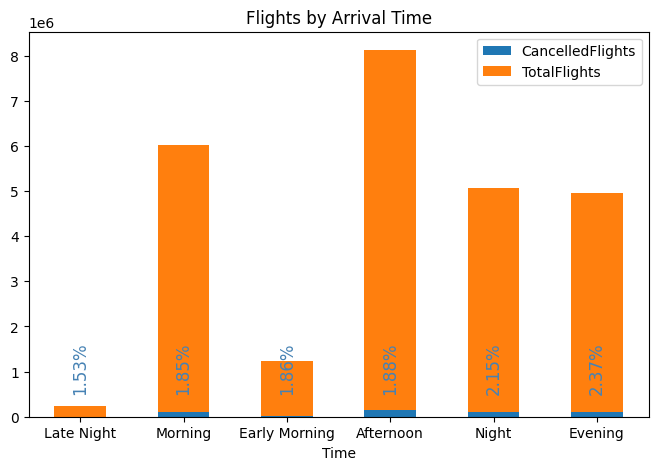

In [ ]:
time_df = time_df.toPandas().sort_values('Percentage of Cancelled Flight')

ax = time_df[["Time", "CancelledFlights", "TotalFlights"]].plot(x="Time", kind="bar", \
                                                                        figsize=(8,5), title="Flights by Arrival Time", \
                                                                        rot=0, stacked=True)

x = [-0.4,0.6,1.6,2.6,3.6,4.6]
for i,pct in enumerate(time_df['Percentage of Cancelled Flight']):
    plt.text(x[i] + 0.4, 500000, f'{pct}%', ha='center', va='bottom',fontsize=12, color='steelblue', rotation=90)

plt.show()

In [ ]:
labels = ['Late Night: 00:00 - 04:59', 'Morning: 08:00 - 11:59','Early Morning: 05:00 - 07:59','Afternoon: 12:00 - 16:59', 'Night: 20:00 - 23:59', 'Evening: 17:00 - 19:59']

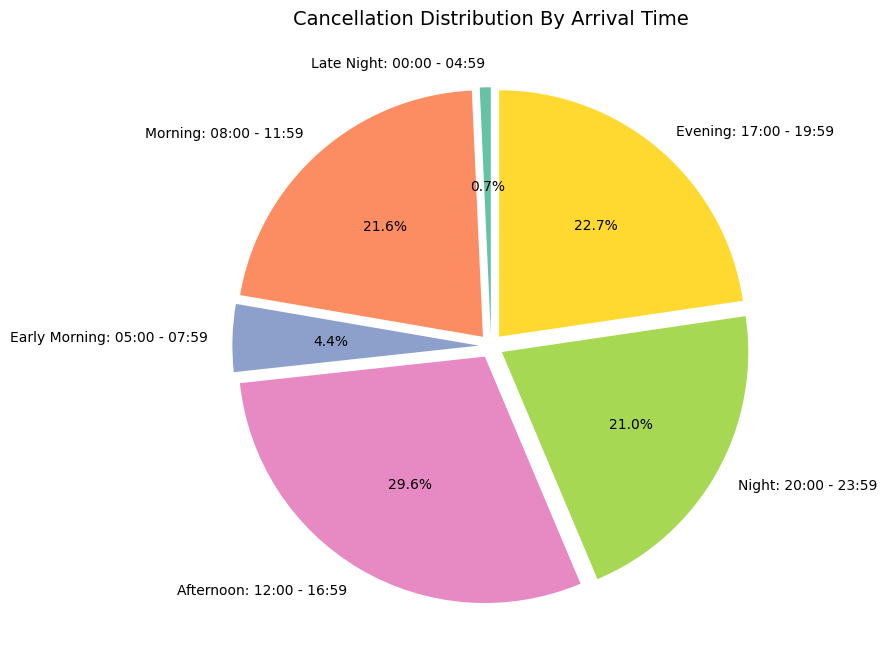

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(time_df['CancelledFlights'], labels=labels, autopct='%1.1f%%', startangle=90,colors=sns.color_palette('Set2') 
        ,explode=[0.05]*len(labels))
plt.title(
    label="Cancellation Distribution By Arrival Time", 
    fontdict={"fontsize":14},
    pad=10
)
plt.show()

# Break

In [ ]:
spark.stop()